## Multiple linear regression

### -- Using Economics Dataset --

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In that 3 columns are used interest rate, unemployment rate and stock index price to predict the GDP price.
interest rate and unemployment rate are independent features and stock index price is the dependent feature.
so remove unnecessary columns.

In [4]:
## remove unnecessary columns
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
## check null value
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

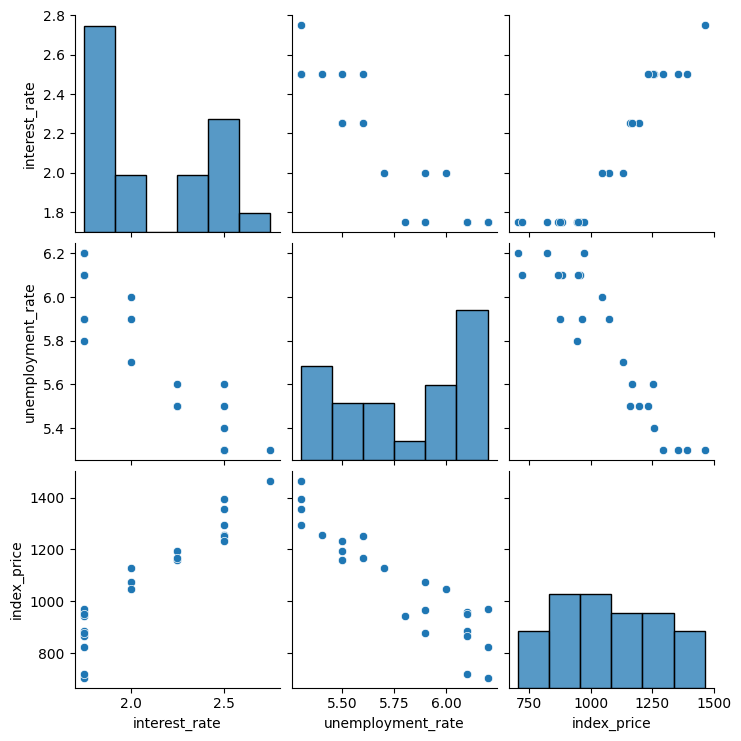

In [7]:
## some visulazation
import seaborn as sns
sns.pairplot(df)

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

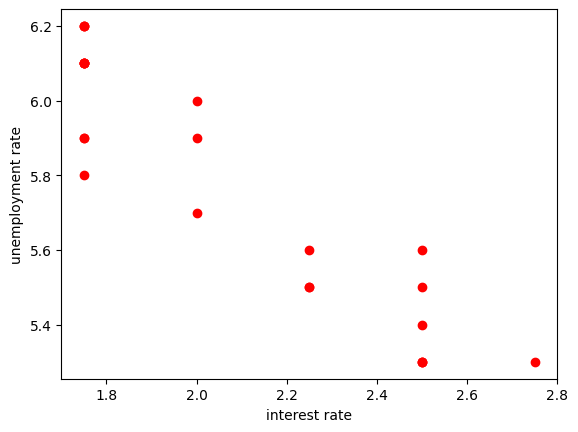

In [9]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

In [10]:
## dependent and independent features
x = df.iloc[:, : -1]   ## for first two row except last row
y = df.iloc[:, -1] ## only for last rows

In [11]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [13]:
## train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [14]:
x_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [15]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

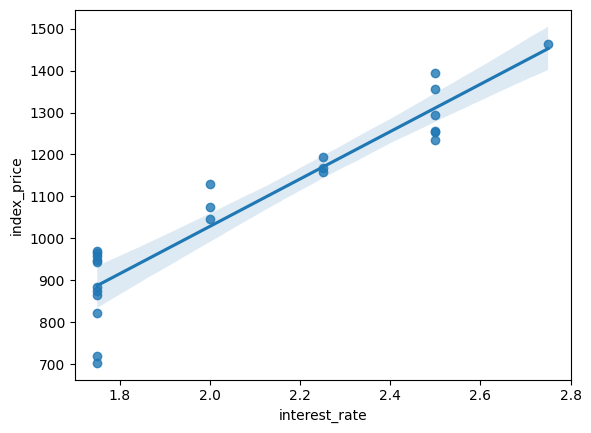

In [16]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

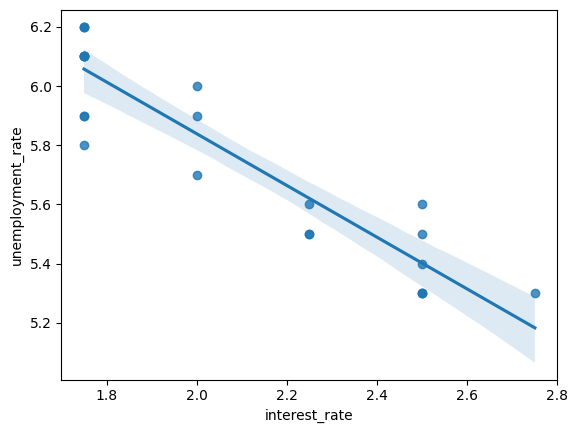

In [17]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [21]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [23]:
regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(regression.coef_)
print(regression.rank_)

[  88.27275507 -116.25716066]
2


In [ ]:
## cross validation
from sklearn.model_selection import cross_val_score

In [27]:
validation_score = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [28]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [29]:
## for prediction
y_pred = regression.predict(x_test)

In [30]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [31]:
## perfomance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE : ', mse)
print('MAE : ', mae)
print('RMSE : ', rmse)

MSE :  8108.567426306604
MAE :  73.80444932337097
RMSE :  90.04758423359621


In [35]:
## R2 scored
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)
## adjusted r2
print(1 - (1- r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


### Assumptions of Multilinear regression

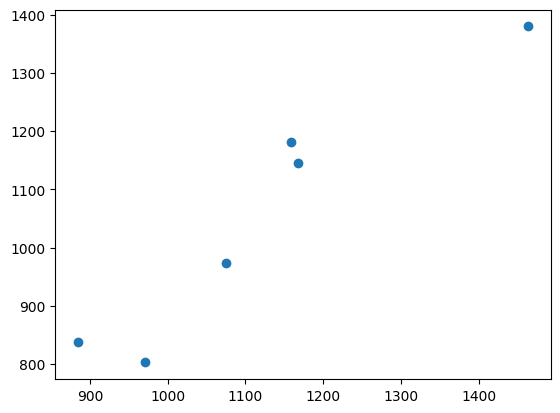

In [37]:
plt.scatter(y_test, y_pred)

In [39]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


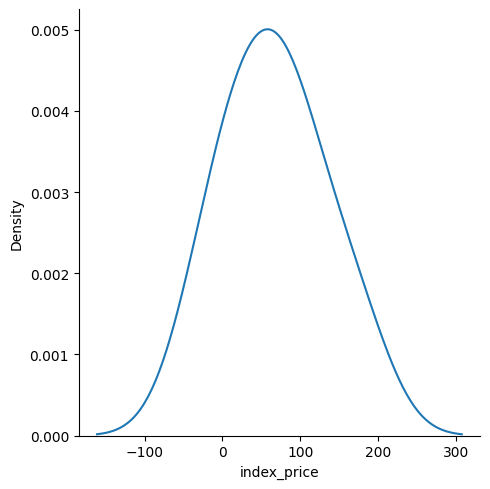

In [ ]:
## plot this residuals
sns.displot(residuals, kind='kde')  ## normal distribution

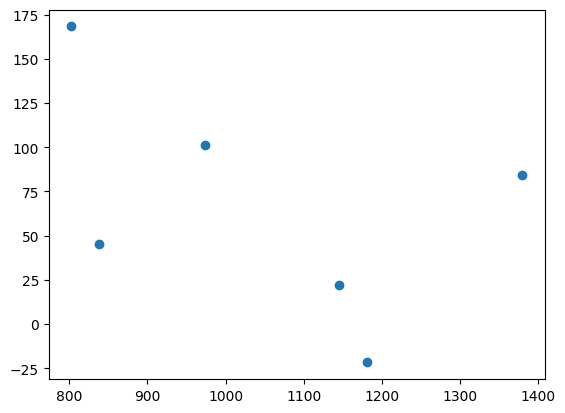

In [41]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

### OLS Linear regression

In [43]:
import statsmodels.api as sm

In [45]:
model = sm.OLS(y_train, x_train).fit()

In [46]:
model.summary()

c:\Coding\AI_ML_DL\start_course\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 23 Sep 2025   Prob (F-statistic):                       0.754
Time:                        07:59:24   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""